In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

In [3]:
customers_data=pd.read_csv('Mall_Customers.csv')
customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customers_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# **Data Visualiztion**

## 1-Gender



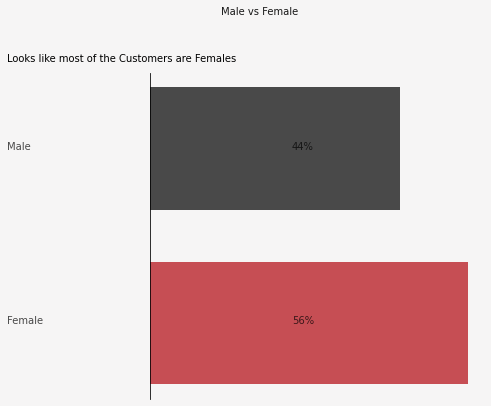

In [6]:
x = customers_data['Gender'].value_counts()

fig,ax=plt.subplots(figsize=(6,6))
ax.barh([1],x.values[1],height=0.7,color='black',alpha=0.7)
plt.text(-50,1, 'Male', alpha = 0.7)
plt.text(50,1, '44%' , alpha = 0.7)



ax.barh([0],x.values[0],height=0.7,color='#b20710',alpha=0.7)
plt.text(-50,0, 'Female', alpha = 0.7)
plt.text(50,0, '56%', alpha = 0.7)


plt.text(25,1.77, 'Male vs Female' , alpha = 0.9)
plt.text(-50,1.5, 'Looks like most of the Customers are Females')


fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## 2-Age



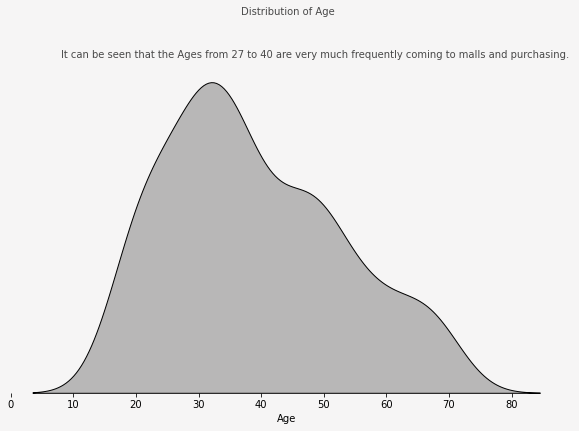

In [7]:
fig=plt.figure(figsize=(10,6))

ax=sns.kdeplot(customers_data["Age"],color="black",fill=True)



fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

#ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.text(0.45,1,"Distribution of Age" , alpha = 0.7)
fig.text(0.2,0.9,"It can be seen that the Ages from 27 to 40 are very much frequently coming to malls and purchasing. ",  alpha = 0.7)

fig.show()

## 3-Annual Income

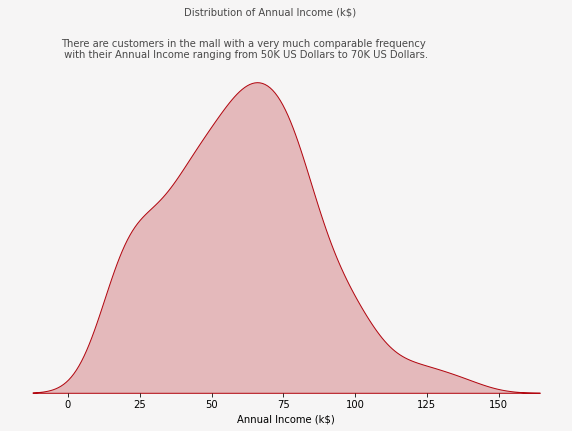

In [8]:
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(customers_data["Annual Income (k$)"],color="#b20710",fill=True)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
fig.text(0.37,1,"Distribution of Annual Income (k$)", alpha = 0.7)
fig.text(0.2,0.9,"There are customers in the mall with a very much comparable frequency \n with their Annual Income ranging from 50K US Dollars to 70K US Dollars.", alpha = 0.7)



#ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## 4-Annual Income vs Gender

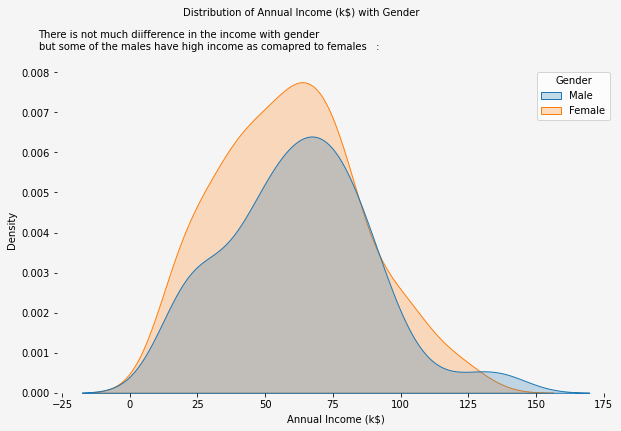

In [9]:
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(x=customers_data["Annual Income (k$)"],hue=customers_data["Gender"],fill=True)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.3,1,"Distribution of Annual Income (k$) with Gender", alpha = 1)
fig.text(0.1,0.92,"There is not much diifference in the income with gender \nbut some of the males have high income as comapred to females   :", alpha = 1)


fig.show()

## 5- Spending Score vs Gender

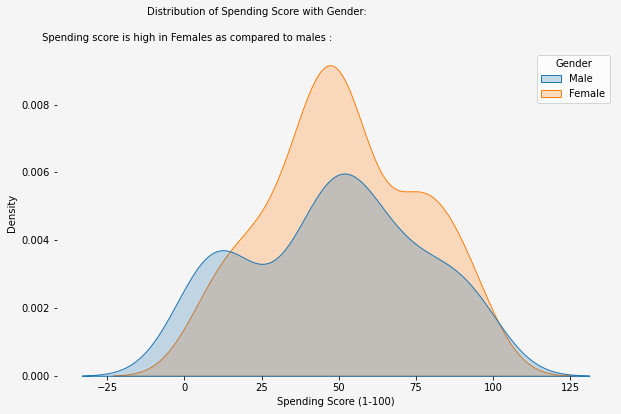

In [10]:
fig=plt.figure(figsize=(10,6))
ax=sns.color_palette("rocket", as_cmap=True)

ax=sns.kdeplot(x=customers_data["Spending Score (1-100)"],hue=customers_data["Gender"],fill=True)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.25,0.96,"Distribution of Spending Score with Gender:", alpha = 1)
fig.text(0.1,0.90," Spending score is high in Females as compared to males :", alpha = 1)


fig.show()

In [12]:
data = customers_data.iloc[:,[3,4]].values

In [18]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(data)

  wcss.append(kmeans.inertia_)

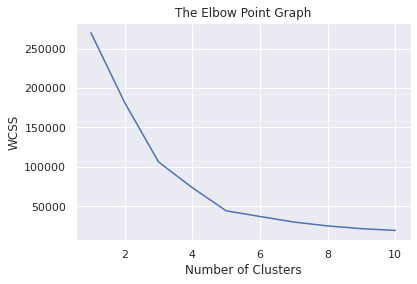

In [19]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
# return a label for each data point based on their cluster
Y = kmeans.fit_predict(data)
print(Y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


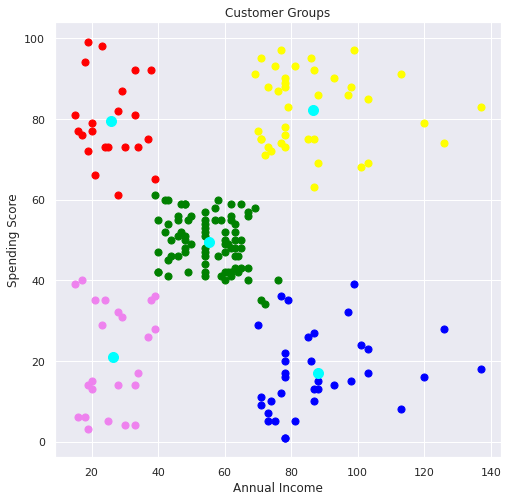

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(data[Y==0,0], data[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(data[Y==1,0], data[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(data[Y==2,0], data[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(data[Y==3,0], data[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(data[Y==4,0], data[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()